In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from skimage import exposure
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


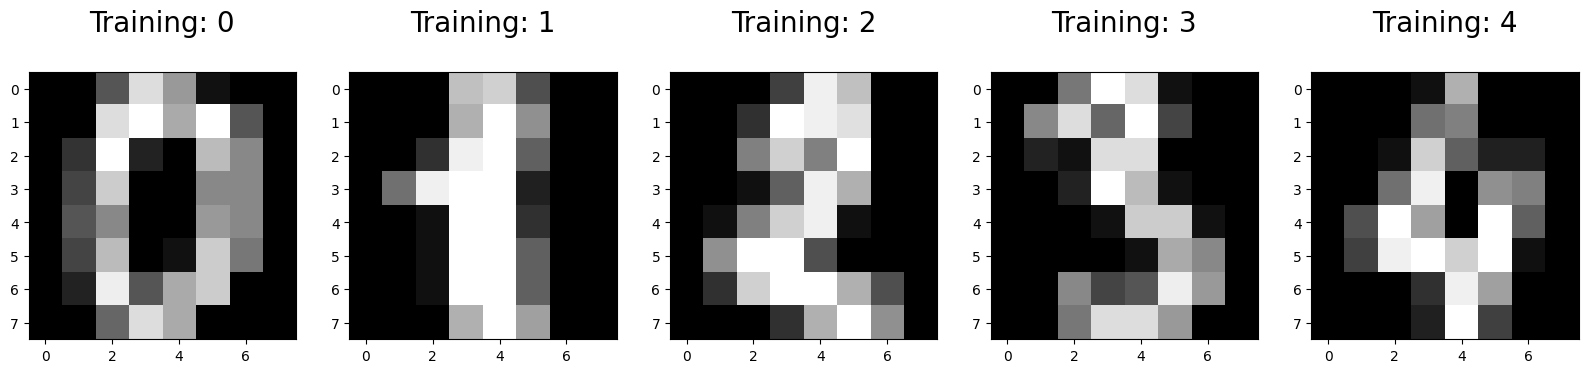

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
# Extract the data and target
X = digits.data
y = digits.target

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# Reshape the images
X = X.reshape(-1, 8, 8)

In [7]:
# Preprocess the image
X_prep = []
for image in X:
    p2, p98 = np.percentile(image, (2, 98))
    img_resc = exposure.rescale_intensity(image, in_range=(p2, p98))

In [8]:
# Flatten and equalize the preprocessed image
X_prep = exposure.equalize_hist(X.reshape((len(X), -1)))  

X_prep = np.array(X_prep)

In [9]:
# Split the dataset into training and testing sets
r = 0
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.3, random_state=r)

The training set (X_train and y_train) is used to train the model; while the test set (X_test and y_test) measures the performance on unseen data.
The goal of splitting the data into these distinct sets is to perform tests on new (unseen) data, to achieve unbiassed and truthful model's peformance evaluation.

In [10]:
# Create a model
rf_clss = RandomForestClassifier(random_state=r)

In [11]:
# Train the model
rf_clss.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
# Make predictions on the testing data
y_pred = rf_clss.predict(X_test)

In [13]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='micro')
rec = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

I chose to tune the number of trees (n_estimators), as it's the most relevant parameter for random forests.
The values applied in this parameter will set the number of decision trees generated in the forest.
Usually, higher number of trees are correlated positively with model accuracy but also with higher training times.

In [14]:
# Hyperparameter tuning
param_g = {
    'n_estimators': [309, 310, 311]
}

grid_s = GridSearchCV(rf_clss, param_g, cv=5)
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [309, 310, 311]})

In [15]:
# Check the best value for the number of trees
grid_s.best_estimator_

RandomForestClassifier(n_estimators=310, random_state=0)

In [16]:
# Train the model with GridSearch best parameters
best_rf_clss = grid_s.best_estimator_
best_rf_clss.fit(X_train, y_train)

RandomForestClassifier(n_estimators=310, random_state=0)

GridSearchCV applied cross-validation to determine the optimal value of number of trees for this particular model (310). Selecting this value, thus leveraging grid search, ensures robust model performance, computational efficiency, and good generalization to unseen data.

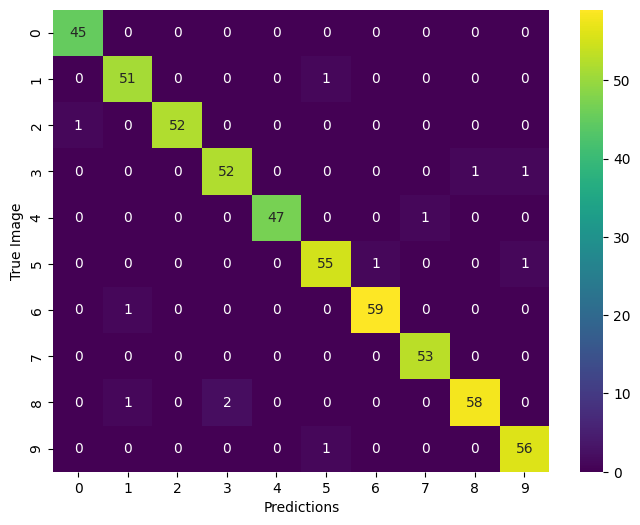

In [17]:
conf_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap="viridis")
plt.xlabel('Predictions')
plt.ylabel('True Image')
plt.show()

The model's predictions accuracy was remarkable. However, the class with the most observable interpretation errors was "8", which saw 3 occurrences (one wrongly classified as a 1 and two wrongly classified as a 3).

In [18]:
# Make predictions using the best model
y_pred_best = best_rf_clss.predict(X_test)

In [19]:
# Evaluate the model's performance
best_acc = accuracy_score(y_test, y_pred_best)
best_prec = precision_score(y_test, y_pred_best, average='macro')
best_f1 = f1_score(y_test, y_pred_best, average='macro')
best_rec = recall_score(y_test, y_pred_best, average='macro')

In [20]:
# Print the metrics
print('Best accuracy: {:.2f}'.format(acc))
print('Best precision: {:.2f}'.format(prec))
print('Best F1 Score: {:.2f}'.format(f1))
print('Best recall: {:.2f}'.format(rec))

Best accuracy: 0.98
Best precision: 0.98
Best F1 Score: 0.98
Best recall: 0.98


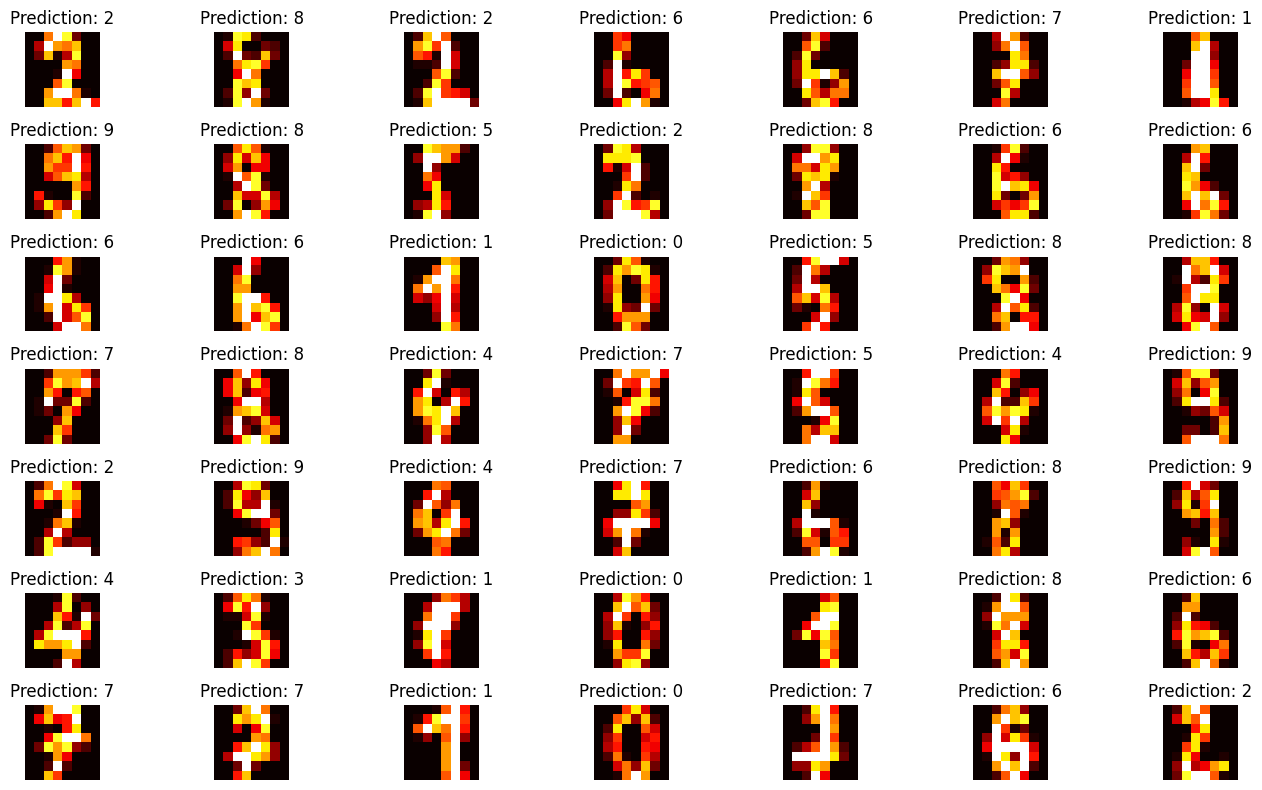

In [21]:
# Visualize sample images and their respective predictions
fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(14, 8))
for n, ax in enumerate(axes.flatten()):
    img = X_test[n].reshape(8, 8)
    pred_label = y_pred_best[n]
    ax.imshow(img, cmap='hot')
    ax.set_title(f"Prediction: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()